In [1]:
import os
import anndata as an
import scanpy as sc
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import matplotlib.gridspec as gridspec
import seaborn as sns
from deside.utility import ExpObj, set_fig_style, sorted_cell_types, read_xy, get_corr, calculate_rmse, read_cancer_purity
from deside.plot import plot_pca
from deside.utility.read_file import ReadH5AD
from matplotlib_venn import venn2
from sklearn.metrics import median_absolute_error
set_fig_style(font_family='Arial', font_size=8)

In [2]:
result_dir = '../results/whole_workflow_20230216_7ds_new_hp_without_caner_cell/DeSide_009/'
dataset_dir = r'../datasets/'
fig_dir = './fig2/'

#### Comparing simulated dataset and TCGA in latent space

In [3]:
dataset_name_mapping = {'Mixed_N100K_random': 'D0_100K', 'Mixed_N100K_segment_filtered': 'D1', 'Mixed_N100K_segment_without_filtering': 'D2'}
# dataset_name_mapping_b = {'Mix_N30K_R': 'Simu. (random)', 'TCGA': 'TCGA', ''}

##### Mixed_N100_random

In [4]:
def read_umap_lower_dim(result_dir, dataset_name, layer_name, dataset_name_mapping, n_cells=5000):
    file_path = os.path.join(result_dir, f'{dataset_name}/{layer_name}_umap_lower_dim.csv')
    umap_lower_dim = pd.read_csv(file_path, index_col=0)
    selected_cells = []
    selected_part1 = umap_lower_dim.loc[umap_lower_dim['class'] == 'TCGA', :].sample(n_cells)
    for _ in dataset_name.split('-'):
        selected_part2 = umap_lower_dim.loc[umap_lower_dim['class'] == dataset_name_mapping[_], :].sample(n_cells)
        selected_cells += selected_part2.index.to_list()
    umap_lower_dim_selected = umap_lower_dim.loc[umap_lower_dim.index.isin(selected_part1.index.to_list() + selected_cells), :].copy()
    umap_lower_dim_selected = umap_lower_dim_selected[~umap_lower_dim_selected.index.duplicated()]
    # umap_lower_dim_selected['class'] = umap_lower_dim_selected['class'].map(dataset_name_mapping_b)
    print('part1: ', selected_part1.shape, 'total: ', umap_lower_dim_selected.shape)
    return umap_lower_dim_selected

In [5]:
def plot_jointplot(data, fig_result_path, color):
    g1 = sns.jointplot(x=f'UMAP1', y=f'UMAP2', data=data, kind='scatter', hue='class', s=2, height=1.3, space=0, rasterized=True, palette=color)
    g1_ax = g1.ax_joint
    g1_ax.set_yticks([])
    g1_ax.set_xticks([])
    g1_ax.legend([],[], frameon=False)
    g1legend = g1_ax.legend(loc='upper left', fontsize=6, borderpad=0, handletextpad=0)
    for _ in g1legend.legendHandles:
        _.set_sizes([1])
    # g1legend.borderpad = 100
    # sns.despine(g1_ax)
    g1.ax_marg_x.tick_params(axis='x', which='both', top=False)
    g1.ax_marg_x.grid(False)
    g1.ax_marg_y.tick_params(axis='y', which='both', right=False)
    g1.ax_marg_y.grid(False)
    g1_ax.set_xlabel('')
    g1_ax.set_ylabel('')

    plt.savefig(fig_result_path, dpi=300)

In [6]:
dataset2color = {'TCGA': 'C5', 'D0_100K': 'C0', 'D1': 'C1', 'D2': 'C2'}

--- Mixed_N100K_random, l_first ---
part1:  (5000, 5) total:  (10000, 5)


/Users/belter/miniconda3/envs/deside/lib/python3.8/site-packages/seaborn/axisgrid.py:1760: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


--- Mixed_N100K_random, l_last ---
part1:  (5000, 5) total:  (10000, 5)


/Users/belter/miniconda3/envs/deside/lib/python3.8/site-packages/seaborn/axisgrid.py:1760: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


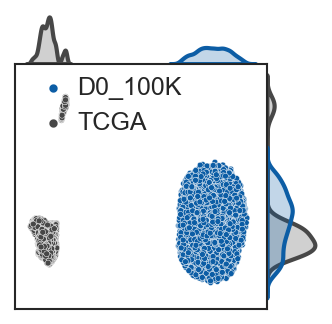

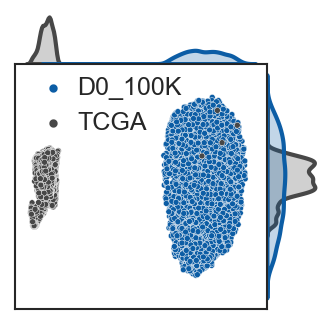

In [7]:
dataset_name = 'Mixed_N100K_random'
for l_name in ['l_first', 'l_last']:
    print(f'--- {dataset_name}, {l_name} ---')
    umap_lower_dim = read_umap_lower_dim(result_dir, dataset_name, layer_name=l_name, dataset_name_mapping=dataset_name_mapping)
    plot_jointplot(data=umap_lower_dim, fig_result_path=os.path.join(fig_dir, f'{l_name}_{dataset_name}.svg'), color=dataset2color)

--- Mixed_N100K_segment_filtered, l_first ---
part1:  (5000, 5) total:  (10000, 5)


/Users/belter/miniconda3/envs/deside/lib/python3.8/site-packages/seaborn/axisgrid.py:1760: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


--- Mixed_N100K_segment_filtered, l_last ---
part1:  (5000, 5) total:  (10000, 5)


/Users/belter/miniconda3/envs/deside/lib/python3.8/site-packages/seaborn/axisgrid.py:1760: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


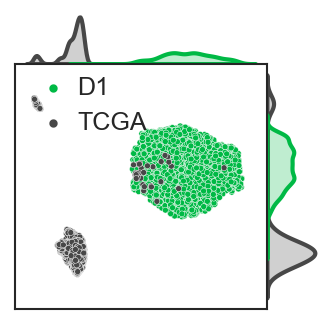

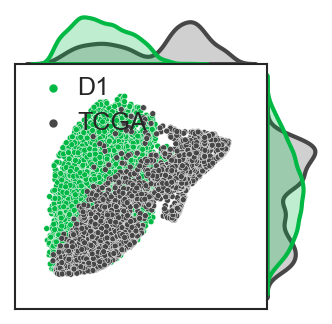

In [8]:
dataset_name = 'Mixed_N100K_segment_filtered'
for l_name in ['l_first', 'l_last']:
    print(f'--- {dataset_name}, {l_name} ---')
    umap_lower_dim = read_umap_lower_dim(result_dir, dataset_name, layer_name=l_name, dataset_name_mapping=dataset_name_mapping)
    plot_jointplot(data=umap_lower_dim, fig_result_path=os.path.join(fig_dir, f'{l_name}_{dataset_name}.svg'), color=dataset2color)

--- Mixed_N100K_segment_without_filtering, l_first ---
part1:  (5000, 5) total:  (10000, 5)


/Users/belter/miniconda3/envs/deside/lib/python3.8/site-packages/seaborn/axisgrid.py:1760: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


--- Mixed_N100K_segment_without_filtering, l_last ---
part1:  (5000, 5) total:  (10000, 5)


/Users/belter/miniconda3/envs/deside/lib/python3.8/site-packages/seaborn/axisgrid.py:1760: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


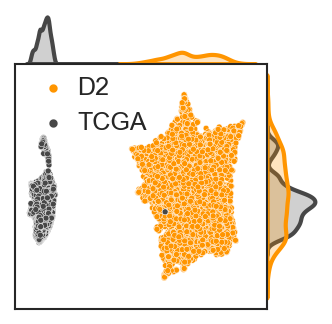

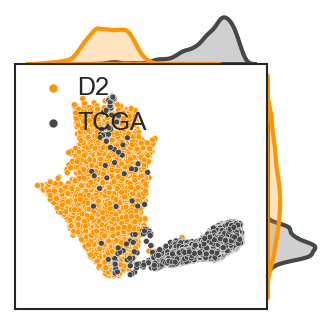

In [9]:
dataset_name = 'Mixed_N100K_segment_without_filtering'
for l_name in ['l_first', 'l_last']:
    print(f'--- {dataset_name}, {l_name} ---')
    umap_lower_dim = read_umap_lower_dim(result_dir, dataset_name, layer_name=l_name, dataset_name_mapping=dataset_name_mapping)
    plot_jointplot(data=umap_lower_dim, fig_result_path=os.path.join(fig_dir, f'{l_name}_{dataset_name}.svg'), color=dataset2color)

--- Mixed_N100K_segment_filtered-Mixed_N100K_segment_without_filtering, l_first ---
part1:  (5000, 5) total:  (14988, 5)


/Users/belter/miniconda3/envs/deside/lib/python3.8/site-packages/seaborn/axisgrid.py:1760: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


--- Mixed_N100K_segment_filtered-Mixed_N100K_segment_without_filtering, l_last ---
part1:  (5000, 5) total:  (14989, 5)


/Users/belter/miniconda3/envs/deside/lib/python3.8/site-packages/seaborn/axisgrid.py:1760: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


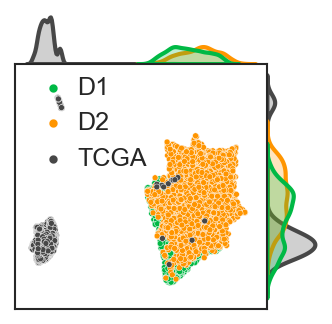

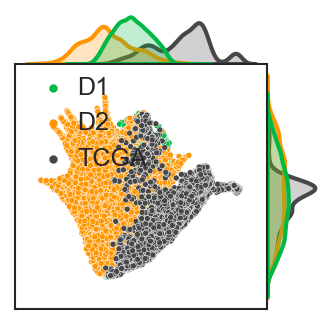

In [10]:
dataset_name = 'Mixed_N100K_segment_filtered-Mixed_N100K_segment_without_filtering'
for l_name in ['l_first', 'l_last']:
    print(f'--- {dataset_name}, {l_name} ---')
    umap_lower_dim = read_umap_lower_dim(result_dir, dataset_name, layer_name=l_name, dataset_name_mapping=dataset_name_mapping)
    plot_jointplot(data=umap_lower_dim, fig_result_path=os.path.join(fig_dir, f'{l_name}_{dataset_name}.svg'), color=dataset2color)

#### Prediction performance on test set

In [11]:
dataset_name = 'Mixed_N100K_random'
test_set_names = ['Test_set0', 'Test_set1', 'Test_set2', 'SCT_POS_N100']
test_set2_dir_name = {'SCT_POS_N100': os.path.join(dataset_dir, 'generated_sc_dataset_7ds_n_base100'),
                      'Test_set0': os.path.join(dataset_dir, 'simulated_bulk_cell_dataset', 'random_7ds_n_base100'),
                      'Test_set1': os.path.join(dataset_dir, 'simulated_bulk_cell_dataset', 'segment_7ds_0.95_n_base100_median_gep'),
                      'Test_set2': os.path.join(dataset_dir, 'simulated_bulk_cell_dataset', 'segment_7ds_0.95_n_base100_median_gep')}

In [12]:
def compare_y_y_pred_plot(y_true, y_pred,
                          show_columns: list = None, result_file_dir=None, annotation: dict = None,
                          y_label=None, x_label=None, dataset_name='average',
                          show_metrics: bool = False, figsize: tuple = (8, 8), ax=None):
    """
    Plot y against y_pred to visualize the performance of prediction result

    :param y_true: this file contains the ground truth of cell fractions when it was simulated

    :param y_pred: this file contains the predicted value of y

    :param show_columns: this list contains the name of columns that want to plot in figure

    :param result_file_dir: where to save results

    :param annotation: annotations that need to show in figure, {anno_name: {col1: value1, col2: value2, ...}, ...}

    :param y_label: y label

    :param x_label: x label

    :param model_name: only for naming files

    :param show_metrics: show correlation and RMSE

    :param figsize: figure size

    :return: None
    """
    y_true = read_xy(a=y_true, xy='cell_frac')
    y_pred = read_xy(a=y_pred, xy='cell_frac')

    # sns.set(font_scale=font_scale)
    if ax is None:
        plt.figure(figsize=figsize)
    else:
        # Use the pyplot interface to change just one subplot...
        plt.sca(ax)
    all_x = []
    all_y = []
    for i, col in enumerate(show_columns):
        _y = y_true.loc[:, col]
        _x = y_pred.loc[:, col]
        all_x.append(_x)
        all_y.append(_y)
        plt.scatter(_x, _y, label=col, s=1, alpha=0.65, rasterized=True)
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xticks([0, 1])
    plt.yticks([0, 0.5, 1])
    x_left, x_right = plt.xlim()
    y_bottom, y_top = plt.ylim()
    x_max = x_right
    y_max = y_top
    plt.plot([0, max(x_max, y_max)], [0, max(x_max, y_max)], linestyle='--', color='tab:gray')
    if show_metrics:  # show metrics in test set
        all_x = np.concatenate(all_x)
        all_y = np.concatenate(all_y)
        corr, p_value = get_corr(all_x, all_y, return_p_value=True)
        rmse = calculate_rmse(y_true=pd.DataFrame(all_x), y_pred=pd.DataFrame(all_y))
        plt.text(0.32 * x_max, 0.15 * y_max, '$r={:.2f}$'.format(corr), fontsize=5)
        if p_value < 0.001:
            plt.text(0.65 * x_max, 0.15 * y_max, '(p<0.001)'.format(p_value), fontsize=5)
        else:
            plt.text(0.65 * x_max, 0.15 * y_max, '(p={:.3f})'.format(p_value), fontsize=5)
        plt.text(0.32 * x_max, 0.05 * y_max, '$RMSE={:.3f}$'.format(rmse), fontsize=5)
    plt.xlabel('')
    plt.ylabel('')
    plt.legend([])
    # plt.tight_layout()
    if result_file_dir:
        plt.savefig(os.path.join(result_file_dir, 'y_true_vs_y_pred_{}.svg'.format(dataset_name)), dpi=300)
    else:
        return ax
    # plt.show()

Model was trained by Mixed_N100K_random, tested on Test_set0
Model was trained by Mixed_N100K_random, tested on Test_set1
Model was trained by Mixed_N100K_random, tested on Test_set2
Model was trained by Mixed_N100K_random, tested on SCT_POS_N100
Model was trained by Mixed_N100K_segment_filtered, tested on Test_set0
Model was trained by Mixed_N100K_segment_filtered, tested on Test_set1
Model was trained by Mixed_N100K_segment_filtered, tested on Test_set2
Model was trained by Mixed_N100K_segment_filtered, tested on SCT_POS_N100
Model was trained by Mixed_N100K_segment_without_filtering, tested on Test_set0
Model was trained by Mixed_N100K_segment_without_filtering, tested on Test_set1
Model was trained by Mixed_N100K_segment_without_filtering, tested on Test_set2
Model was trained by Mixed_N100K_segment_without_filtering, tested on SCT_POS_N100
Model was trained by Mixed_N100K_segment_filtered-Mixed_N100K_segment_without_filtering, tested on Test_set0
Model was trained by Mixed_N100K_s

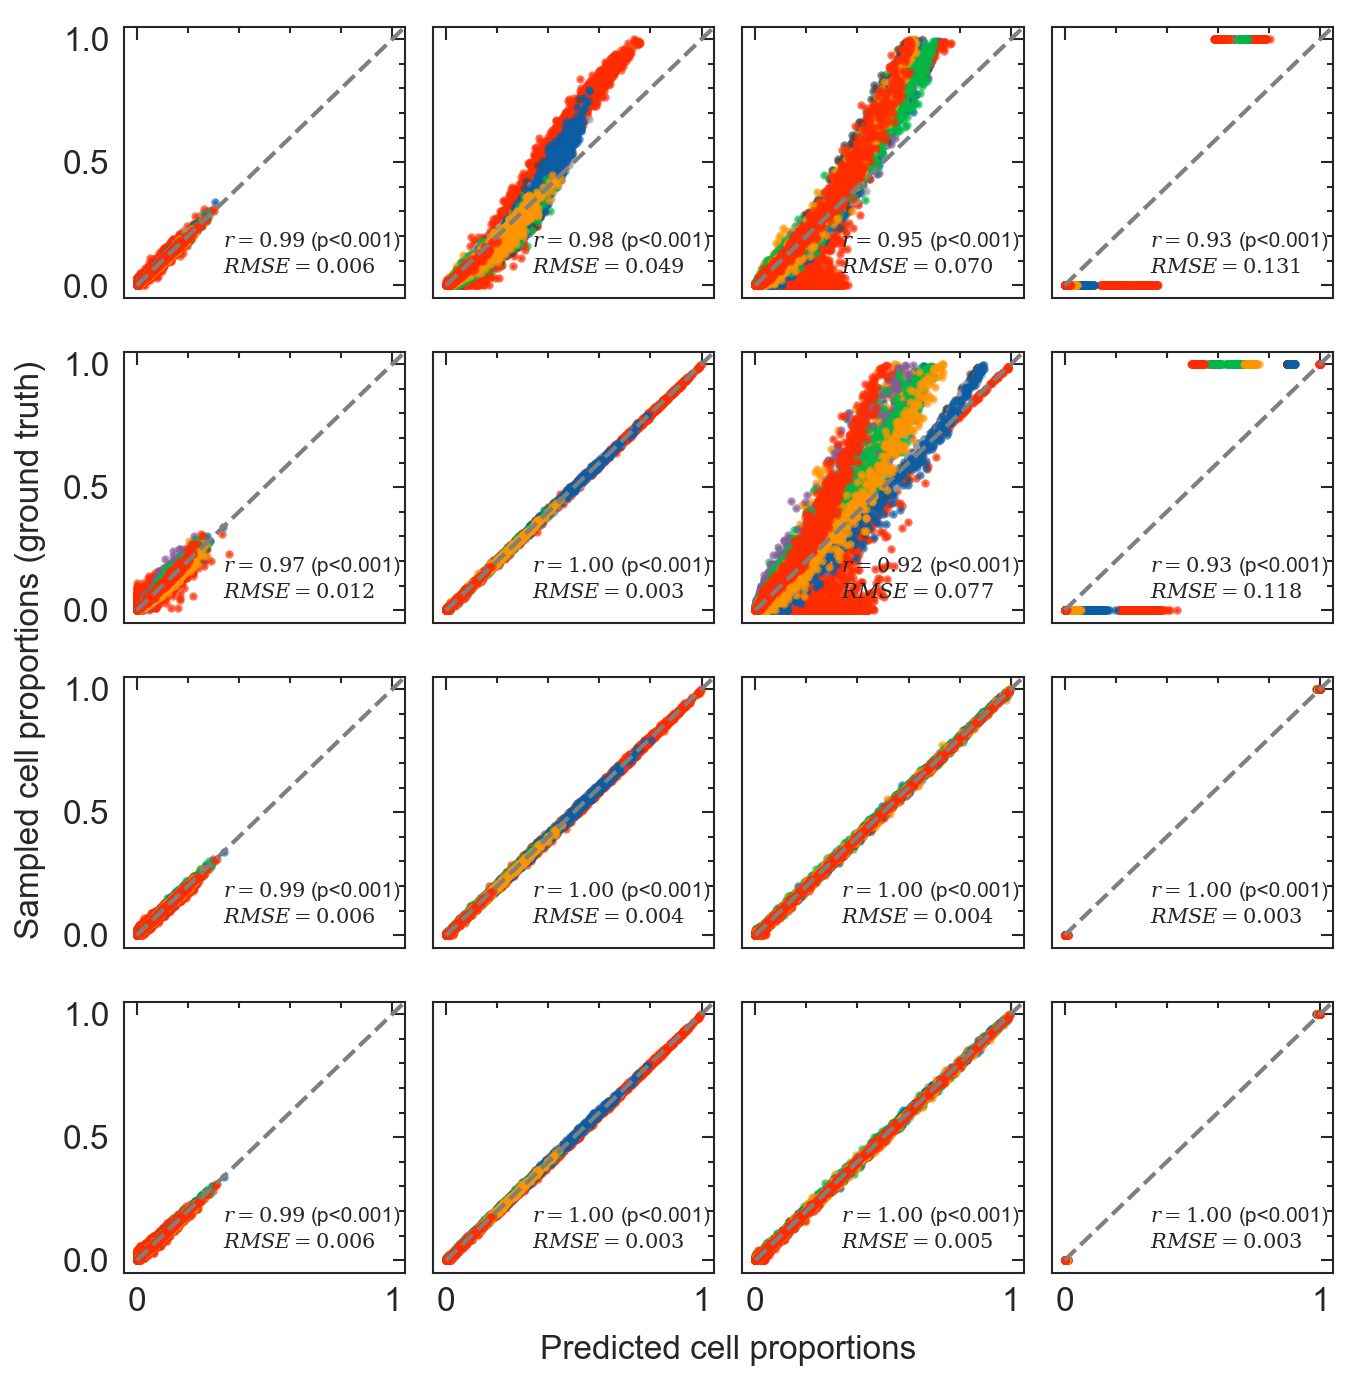

In [13]:
# y_true = ReadH5AD(y_true_file_path).get_cell_fraction()
fig, axes = plt.subplots(4, 4, sharex=True, sharey=True, figsize=(5.2, 5.5))
plt.subplots_adjust(wspace=0.1, hspace=0.2)
train_set_names = ['Mixed_N100K_random', 'Mixed_N100K_segment_filtered', 'Mixed_N100K_segment_without_filtering', 'Mixed_N100K_segment_filtered-Mixed_N100K_segment_without_filtering']
for i in range(4):
    train_set_name = train_set_names[i]
    for j in range(4):
        test_set_name = test_set_names[j]
        print(f'Model was trained by {train_set_name}, tested on {test_set_name}')
        y_true_file_path = os.path.join(test_set2_dir_name[test_set_name], f'simu_bulk_exp_{test_set_name}_log2cpm1p.h5ad')
        y_pred_file_path = os.path.join(result_dir, train_set_name, test_set_name, f'{test_set_name}_pred_cell_frac.csv')
        compare_y_y_pred_plot(y_pred=y_pred_file_path, y_true=y_true_file_path, show_columns=sorted_cell_types, show_metrics=True, figsize=(1.5, 1.5), dataset_name=None, ax=axes[i, j])
# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("Predicted cell proportions")
plt.ylabel("Sampled cell proportions (ground truth)")
        
plt.savefig(os.path.join(fig_dir, 'y_true_vs_y_pred_4_train_set_4_test_set.svg'), dpi=300)

#### Comparing predicted cell proportion of cancer cells with CPE

In [14]:
# outlier_file_path = os.path.join(dataset_dir, 'TCGA', 'outliers_TCGA.csv')
outlier_file_path = None
cpe_file_path = os.path.join(dataset_dir, 'cancer_purity', 'cancer_purity.csv')
dataset_names = ['Mixed_N100K_segment_filtered-Mixed_N100K_segment_without_filtering'] + \
                [f'Mixed_N100K_segment_filtered_{i}-Mixed_N100K_segment_without_filtering' for i in range(1, 5)] + \
                ['Mixed_N100K_random'] + [f'Mixed_N100K_random_{i}' for i in range(1, 5)] + \
                ['Mixed_N100K_segment_filtered'] + [f'Mixed_N100K_segment_filtered_{i}' for i in range(1, 5)] + \
                ['Mixed_N100K_segment_without_filtering'] + [f'Mixed_N100K_segment_without_filtering_{i}' for i in range(1, 5)]
dataset_names

['Mixed_N100K_segment_filtered-Mixed_N100K_segment_without_filtering',
 'Mixed_N100K_segment_filtered_1-Mixed_N100K_segment_without_filtering',
 'Mixed_N100K_segment_filtered_2-Mixed_N100K_segment_without_filtering',
 'Mixed_N100K_segment_filtered_3-Mixed_N100K_segment_without_filtering',
 'Mixed_N100K_segment_filtered_4-Mixed_N100K_segment_without_filtering',
 'Mixed_N100K_random',
 'Mixed_N100K_random_1',
 'Mixed_N100K_random_2',
 'Mixed_N100K_random_3',
 'Mixed_N100K_random_4',
 'Mixed_N100K_segment_filtered',
 'Mixed_N100K_segment_filtered_1',
 'Mixed_N100K_segment_filtered_2',
 'Mixed_N100K_segment_filtered_3',
 'Mixed_N100K_segment_filtered_4',
 'Mixed_N100K_segment_without_filtering',
 'Mixed_N100K_segment_without_filtering_1',
 'Mixed_N100K_segment_without_filtering_2',
 'Mixed_N100K_segment_without_filtering_3',
 'Mixed_N100K_segment_without_filtering_4']

In [15]:
def read_pred_result(file_path, col_names, outlier_file_path=None):
    try:
        cell_prop = pd.read_csv(file_path, index_col='sample_id')
    except:
        cell_prop = pd.read_csv(file_path, index_col=0)
    sample_inx = cell_prop.index
    if not (outlier_file_path is None):
        outliers = pd.read_csv(outlier_file_path, index_col=0)
        print(f'{outliers.shape[0]} outliers will be removed')
        sample_inx = cell_prop.loc[~cell_prop.index.isin(outliers.index), :].index
    cell_prop = cell_prop.loc[sample_inx, col_names].copy()
    return cell_prop

In [16]:
cancer_cell_prop_all = None
# sample_id = None
for ds in dataset_names:
    y_pred_file_path = os.path.join(result_dir, ds, 'predicted_cell_fraction_tcga', 'DeSide', 'all_predicted_cell_fraction_by_DeSide.csv')
    _ = read_pred_result(y_pred_file_path, col_names=['Cancer Cells', 'cancer_type'], outlier_file_path=outlier_file_path)
    if cancer_cell_prop_all is None:
        cancer_cell_prop_all = pd.DataFrame(index=_.index, columns=dataset_names)
    else:
        assert np.all(cancer_cell_prop_all.index == _.index)
    if 'cancer_type' not in cancer_cell_prop_all.columns:
        cancer_cell_prop_all['cancer_type'] = _['cancer_type']
    cancer_cell_prop_all[ds] = _['Cancer Cells']
cancer_cell_prop_all.shape

(7699, 21)

In [17]:
cancer_cell_prop_all.head(2)

,Mixed_N100K_segment_filtered-Mixed_N100K_segment_without_filtering,Mixed_N100K_segment_filtered_1-Mixed_N100K_segment_without_filtering,Mixed_N100K_segment_filtered_2-Mixed_N100K_segment_without_filtering,Mixed_N100K_segment_filtered_3-Mixed_N100K_segment_without_filtering,Mixed_N100K_segment_filtered_4-Mixed_N100K_segment_without_filtering,Mixed_N100K_random,Mixed_N100K_random_1,Mixed_N100K_random_2,Mixed_N100K_random_3,Mixed_N100K_random_4,...,Mixed_N100K_segment_filtered_1,Mixed_N100K_segment_filtered_2,Mixed_N100K_segment_filtered_3,Mixed_N100K_segment_filtered_4,Mixed_N100K_segment_without_filtering,Mixed_N100K_segment_without_filtering_1,Mixed_N100K_segment_without_filtering_2,Mixed_N100K_segment_without_filtering_3,Mixed_N100K_segment_without_filtering_4,cancer_type
sample_id,,,,,,,,,,,,,,,,,,,,,
TCGA-CV-5442-01A,0.963,0.964,0.964,0.963,0.966,0.655,0.796,0.902,0.803,0.720,...,0.937,0.951,0.949,0.961,0.964,0.933,0.943,0.977,0.947,HNSC
TCGA-CR-7392-01A,0.446,0.417,0.455,0.449,0.444,0.390,0.371,0.454,0.420,0.386,...,0.440,0.464,0.454,0.435,0.350,0.374,0.406,0.381,0.393,HNSC


In [18]:
rep_5_d1d2 = dataset_names[:5]
rep_5_d0 = dataset_names[5:10]
rep_5_d1 = dataset_names[10:15]
rep_5_d2 = dataset_names[15:]
rep_dict = {'rep_5_d1d2': rep_5_d1d2, 'rep_5_d0': rep_5_d0, 'rep_5_d1': rep_5_d1, 'rep_5_d2': rep_5_d2}
for k, v in rep_dict.items():
    print(k, v)

rep_5_d1d2 ['Mixed_N100K_segment_filtered-Mixed_N100K_segment_without_filtering', 'Mixed_N100K_segment_filtered_1-Mixed_N100K_segment_without_filtering', 'Mixed_N100K_segment_filtered_2-Mixed_N100K_segment_without_filtering', 'Mixed_N100K_segment_filtered_3-Mixed_N100K_segment_without_filtering', 'Mixed_N100K_segment_filtered_4-Mixed_N100K_segment_without_filtering']
rep_5_d0 ['Mixed_N100K_random', 'Mixed_N100K_random_1', 'Mixed_N100K_random_2', 'Mixed_N100K_random_3', 'Mixed_N100K_random_4']
rep_5_d1 ['Mixed_N100K_segment_filtered', 'Mixed_N100K_segment_filtered_1', 'Mixed_N100K_segment_filtered_2', 'Mixed_N100K_segment_filtered_3', 'Mixed_N100K_segment_filtered_4']
rep_5_d2 ['Mixed_N100K_segment_without_filtering', 'Mixed_N100K_segment_without_filtering_1', 'Mixed_N100K_segment_without_filtering_2', 'Mixed_N100K_segment_without_filtering_3', 'Mixed_N100K_segment_without_filtering_4']


In [19]:
cancer_purity = read_cancer_purity(cpe_file_path, sample_names=cancer_cell_prop_all.index.to_list())
print(cancer_purity.shape)
cancer_purity.head(2)

(7452, 7)


,Cancer type,ESTIMATE,ABSOLUTE,LUMP,IHC,CPE,Unnamed: 7
Sample ID,,,,,,,
TCGA-AO-A0J9-01A,BRCA,0.5540,0.38,NaN,0.85,0.5233,NaN
TCGA-DD-A73A-01A,LIHC,0.8801,NaN,0.6474,0.90,0.8477,NaN


In [20]:
cancer_cell_prop = cancer_cell_prop_all.merge(cancer_purity, left_index=True, right_index=True)
cancer_cell_prop.shape

(7452, 28)

In [21]:
# calculate the RMSE between predicted cell proprotions and CPE of each tumor type
cancer_cell_vs_cpe_rmse = pd.DataFrame(index=cancer_cell_prop['cancer_type'].unique(), columns=dataset_names)
for cancer_type, _group in cancer_cell_prop.groupby('cancer_type'):
    for ds in dataset_names:
        cancer_cell_vs_cpe_rmse.loc[cancer_type, ds] = calculate_rmse(pd.DataFrame(_group[ds]), pd.DataFrame(_group['CPE']))
cancer_cell_vs_cpe_rmse

,Mixed_N100K_segment_filtered-Mixed_N100K_segment_without_filtering,Mixed_N100K_segment_filtered_1-Mixed_N100K_segment_without_filtering,Mixed_N100K_segment_filtered_2-Mixed_N100K_segment_without_filtering,Mixed_N100K_segment_filtered_3-Mixed_N100K_segment_without_filtering,Mixed_N100K_segment_filtered_4-Mixed_N100K_segment_without_filtering,Mixed_N100K_random,Mixed_N100K_random_1,Mixed_N100K_random_2,Mixed_N100K_random_3,Mixed_N100K_random_4,Mixed_N100K_segment_filtered,Mixed_N100K_segment_filtered_1,Mixed_N100K_segment_filtered_2,Mixed_N100K_segment_filtered_3,Mixed_N100K_segment_filtered_4,Mixed_N100K_segment_without_filtering,Mixed_N100K_segment_without_filtering_1,Mixed_N100K_segment_without_filtering_2,Mixed_N100K_segment_without_filtering_3,Mixed_N100K_segment_without_filtering_4
HNSC,0.116316,0.118376,0.12224,0.121615,0.119636,0.184668,0.126641,0.096913,0.118189,0.115747,0.118505,0.113535,0.115205,0.114365,0.115002,0.118363,0.113961,0.115045,0.118946,0.117515
ACC,0.222342,0.239373,0.184277,0.210632,0.23189,0.646157,0.406307,0.31613,0.417952,0.460511,0.250094,0.308375,0.255769,0.271947,0.281922,0.309948,0.351531,0.322864,0.296878,0.367961
LUAD,0.129453,0.133344,0.125969,0.129283,0.13509,0.25001,0.169226,0.131514,0.172817,0.159416,0.130742,0.152265,0.134206,0.132732,0.133469,0.191822,0.19662,0.171961,0.177573,0.184802
CESC,0.104074,0.106029,0.10857,0.10825,0.106916,0.182185,0.12579,0.095434,0.126866,0.125715,0.102366,0.100543,0.100917,0.101923,0.100983,0.104502,0.101058,0.103804,0.10651,0.105433
UCEC,0.118844,0.119538,0.117134,0.117656,0.118603,0.321361,0.205695,0.147031,0.217162,0.188648,0.118138,0.127685,0.120793,0.118759,0.118092,0.147373,0.156919,0.144707,0.153618,0.162355
LIHC,0.143502,0.150084,0.129807,0.123976,0.133915,0.516467,0.245692,0.199318,0.226317,0.237243,0.150908,0.176592,0.148412,0.143445,0.150092,0.21314,0.200233,0.204588,0.175987,0.200631
KICH,0.129707,0.150441,0.12898,0.127022,0.126824,0.542722,0.3166,0.206734,0.325727,0.357087,0.156468,0.181578,0.150245,0.160201,0.156852,0.223991,0.220517,0.212758,0.170246,0.233773
PRAD,0.181478,0.197944,0.179271,0.165973,0.177489,0.481133,0.339833,0.249766,0.344107,0.308133,0.185654,0.211309,0.202777,0.180535,0.175443,0.264416,0.284955,0.263165,0.255845,0.269618
READ,0.105753,0.105744,0.105903,0.114362,0.10793,0.202595,0.115683,0.086628,0.126869,0.093195,0.105277,0.101124,0.099424,0.103383,0.104746,0.10714,0.102024,0.104593,0.109175,0.107333
GBM,0.382463,0.407454,0.373781,0.378041,0.37808,0.608661,0.507948,0.444052,0.493662,0.43306,0.395858,0.458469,0.392959,0.407916,0.399056,0.41755,0.386007,0.454529,0.433392,0.444769


In [22]:
# calculate average and STD of RMSE across different tumor types
for k, rep in rep_dict.items():
    cancer_cell_vs_cpe_rmse[f'{k}_mean'] = cancer_cell_vs_cpe_rmse.loc[:, rep].mean(axis=1)
    cancer_cell_vs_cpe_rmse[f'{k}_std'] = cancer_cell_vs_cpe_rmse.loc[:, rep].std(axis=1)
    cancer_cell_vs_cpe_rmse.head(2)
cancer_cell_vs_cpe_rmse.head(2)

,Mixed_N100K_segment_filtered-Mixed_N100K_segment_without_filtering,Mixed_N100K_segment_filtered_1-Mixed_N100K_segment_without_filtering,Mixed_N100K_segment_filtered_2-Mixed_N100K_segment_without_filtering,Mixed_N100K_segment_filtered_3-Mixed_N100K_segment_without_filtering,Mixed_N100K_segment_filtered_4-Mixed_N100K_segment_without_filtering,Mixed_N100K_random,Mixed_N100K_random_1,Mixed_N100K_random_2,Mixed_N100K_random_3,Mixed_N100K_random_4,...,Mixed_N100K_segment_without_filtering_3,Mixed_N100K_segment_without_filtering_4,rep_5_d1d2_mean,rep_5_d1d2_std,rep_5_d0_mean,rep_5_d0_std,rep_5_d1_mean,rep_5_d1_std,rep_5_d2_mean,rep_5_d2_std
HNSC,0.116316,0.118376,0.12224,0.121615,0.119636,0.184668,0.126641,0.096913,0.118189,0.115747,...,0.118946,0.117515,0.119637,0.002414,0.128432,0.033260,0.115322,0.001895,0.116766,0.002162
ACC,0.222342,0.239373,0.184277,0.210632,0.23189,0.646157,0.406307,0.31613,0.417952,0.460511,...,0.296878,0.367961,0.217703,0.021562,0.449411,0.121906,0.273621,0.023194,0.329836,0.029388


In [23]:
# calculate the correlation between predicted cell proprotions and CPE of each tumor type
cancer_cell_vs_cpe_corr = pd.DataFrame(index=cancer_cell_prop['cancer_type'].unique(), columns=dataset_names)
for cancer_type, _group in cancer_cell_prop.groupby('cancer_type'):
    for ds in dataset_names:
        cancer_cell_vs_cpe_corr.loc[cancer_type, ds] = get_corr(_group[ds], _group['CPE'])
cancer_cell_vs_cpe_corr

,Mixed_N100K_segment_filtered-Mixed_N100K_segment_without_filtering,Mixed_N100K_segment_filtered_1-Mixed_N100K_segment_without_filtering,Mixed_N100K_segment_filtered_2-Mixed_N100K_segment_without_filtering,Mixed_N100K_segment_filtered_3-Mixed_N100K_segment_without_filtering,Mixed_N100K_segment_filtered_4-Mixed_N100K_segment_without_filtering,Mixed_N100K_random,Mixed_N100K_random_1,Mixed_N100K_random_2,Mixed_N100K_random_3,Mixed_N100K_random_4,Mixed_N100K_segment_filtered,Mixed_N100K_segment_filtered_1,Mixed_N100K_segment_filtered_2,Mixed_N100K_segment_filtered_3,Mixed_N100K_segment_filtered_4,Mixed_N100K_segment_without_filtering,Mixed_N100K_segment_without_filtering_1,Mixed_N100K_segment_without_filtering_2,Mixed_N100K_segment_without_filtering_3,Mixed_N100K_segment_without_filtering_4
HNSC,0.744204,0.741716,0.73648,0.74157,0.736458,0.637348,0.70191,0.718763,0.690839,0.74327,0.731861,0.732331,0.733196,0.740189,0.736558,0.712612,0.722479,0.719813,0.720911,0.711834
ACC,0.863261,0.858969,0.855483,0.854319,0.865621,0.63019,0.817802,0.839579,0.81231,0.70571,0.865571,0.857654,0.862682,0.859963,0.861306,0.782867,0.790714,0.790529,0.75164,0.824682
LUAD,0.774822,0.77263,0.769009,0.763369,0.765801,0.527867,0.726278,0.743706,0.709705,0.669528,0.756679,0.734972,0.749663,0.760587,0.75621,0.71732,0.700561,0.710952,0.722589,0.724248
CESC,0.697847,0.696789,0.695542,0.702434,0.694757,0.551707,0.668469,0.640843,0.618,0.672216,0.695701,0.69627,0.699753,0.699936,0.701827,0.666274,0.669472,0.671718,0.661316,0.663296
UCEC,0.513514,0.512437,0.506641,0.505635,0.506238,0.306384,0.459752,0.472965,0.408041,0.407129,0.508295,0.493768,0.510696,0.511082,0.508385,0.472417,0.466046,0.466613,0.487665,0.471056
LIHC,0.681747,0.674593,0.685619,0.691238,0.679821,0.231981,0.569149,0.623805,0.622568,0.509008,0.673548,0.638511,0.672814,0.680591,0.669066,0.588673,0.60898,0.592185,0.635699,0.600839
KICH,0.920809,0.912722,0.907862,0.91369,0.909615,0.666992,0.869641,0.893542,0.852228,0.734638,0.91328,0.890184,0.910807,0.902488,0.909562,0.853069,0.867746,0.867254,0.892803,0.875239
PRAD,0.539033,0.524931,0.528395,0.530079,0.532862,0.340829,0.486233,0.485375,0.470798,0.44685,0.537478,0.524576,0.520075,0.533773,0.535914,0.496998,0.492618,0.486045,0.496659,0.517447
READ,0.65549,0.655254,0.654772,0.657717,0.656864,0.491598,0.643235,0.643881,0.628528,0.621606,0.657201,0.650702,0.656307,0.658757,0.65234,0.64574,0.629166,0.637989,0.637139,0.635298
GBM,0.748887,0.701676,0.753644,0.746295,0.744933,0.694377,0.639722,0.771064,0.728802,0.643987,0.754661,0.706957,0.7377,0.731254,0.742933,0.745933,0.758634,0.656524,0.694482,0.719001


In [24]:
for k, rep in rep_dict.items():
    cancer_cell_vs_cpe_corr[f'{k}_mean'] = cancer_cell_vs_cpe_corr.loc[:, rep].mean(axis=1)
    cancer_cell_vs_cpe_corr[f'{k}_std'] = cancer_cell_vs_cpe_corr.loc[:, rep].std(axis=1)
    cancer_cell_vs_cpe_corr.head(2)
cancer_cell_vs_cpe_corr.head(2)

,Mixed_N100K_segment_filtered-Mixed_N100K_segment_without_filtering,Mixed_N100K_segment_filtered_1-Mixed_N100K_segment_without_filtering,Mixed_N100K_segment_filtered_2-Mixed_N100K_segment_without_filtering,Mixed_N100K_segment_filtered_3-Mixed_N100K_segment_without_filtering,Mixed_N100K_segment_filtered_4-Mixed_N100K_segment_without_filtering,Mixed_N100K_random,Mixed_N100K_random_1,Mixed_N100K_random_2,Mixed_N100K_random_3,Mixed_N100K_random_4,...,Mixed_N100K_segment_without_filtering_3,Mixed_N100K_segment_without_filtering_4,rep_5_d1d2_mean,rep_5_d1d2_std,rep_5_d0_mean,rep_5_d0_std,rep_5_d1_mean,rep_5_d1_std,rep_5_d2_mean,rep_5_d2_std
HNSC,0.744204,0.741716,0.73648,0.74157,0.736458,0.637348,0.70191,0.718763,0.690839,0.74327,...,0.720911,0.711834,0.740086,0.003463,0.698426,0.039449,0.734827,0.003515,0.717530,0.004944
ACC,0.863261,0.858969,0.855483,0.854319,0.865621,0.63019,0.817802,0.839579,0.81231,0.70571,...,0.75164,0.824682,0.859531,0.004870,0.761118,0.089724,0.861435,0.002964,0.788086,0.026018


In [25]:
cancer_cell_vs_cpe_corr.to_csv(os.path.join(fig_dir, 'cancer_cell_vs_cpe_corr.csv'))
cancer_cell_vs_cpe_rmse.to_csv(os.path.join(fig_dir, 'cancer_cell_vs_cpe_rmse.csv'))

In [26]:
cancer_cell_vs_cpe_rmse = cancer_cell_vs_cpe_rmse.sort_values(by=['rep_5_d1d2_mean'], ascending=False)
cancer_cell_vs_cpe_rmse.head(2)

,Mixed_N100K_segment_filtered-Mixed_N100K_segment_without_filtering,Mixed_N100K_segment_filtered_1-Mixed_N100K_segment_without_filtering,Mixed_N100K_segment_filtered_2-Mixed_N100K_segment_without_filtering,Mixed_N100K_segment_filtered_3-Mixed_N100K_segment_without_filtering,Mixed_N100K_segment_filtered_4-Mixed_N100K_segment_without_filtering,Mixed_N100K_random,Mixed_N100K_random_1,Mixed_N100K_random_2,Mixed_N100K_random_3,Mixed_N100K_random_4,...,Mixed_N100K_segment_without_filtering_3,Mixed_N100K_segment_without_filtering_4,rep_5_d1d2_mean,rep_5_d1d2_std,rep_5_d0_mean,rep_5_d0_std,rep_5_d1_mean,rep_5_d1_std,rep_5_d2_mean,rep_5_d2_std
GBM,0.382463,0.407454,0.373781,0.378041,0.37808,0.608661,0.507948,0.444052,0.493662,0.43306,...,0.433392,0.444769,0.383964,0.013485,0.497476,0.069803,0.410852,0.027204,0.427249,0.026851
KIRC,0.383724,0.381783,0.364238,0.366444,0.389632,0.530526,0.40705,0.340609,0.402122,0.325987,...,0.427824,0.432398,0.377164,0.011201,0.401259,0.080760,0.396436,0.014755,0.435121,0.006658


In [27]:
cancer_cell_vs_cpe_corr = cancer_cell_vs_cpe_corr.loc[cancer_cell_vs_cpe_rmse.index, :]

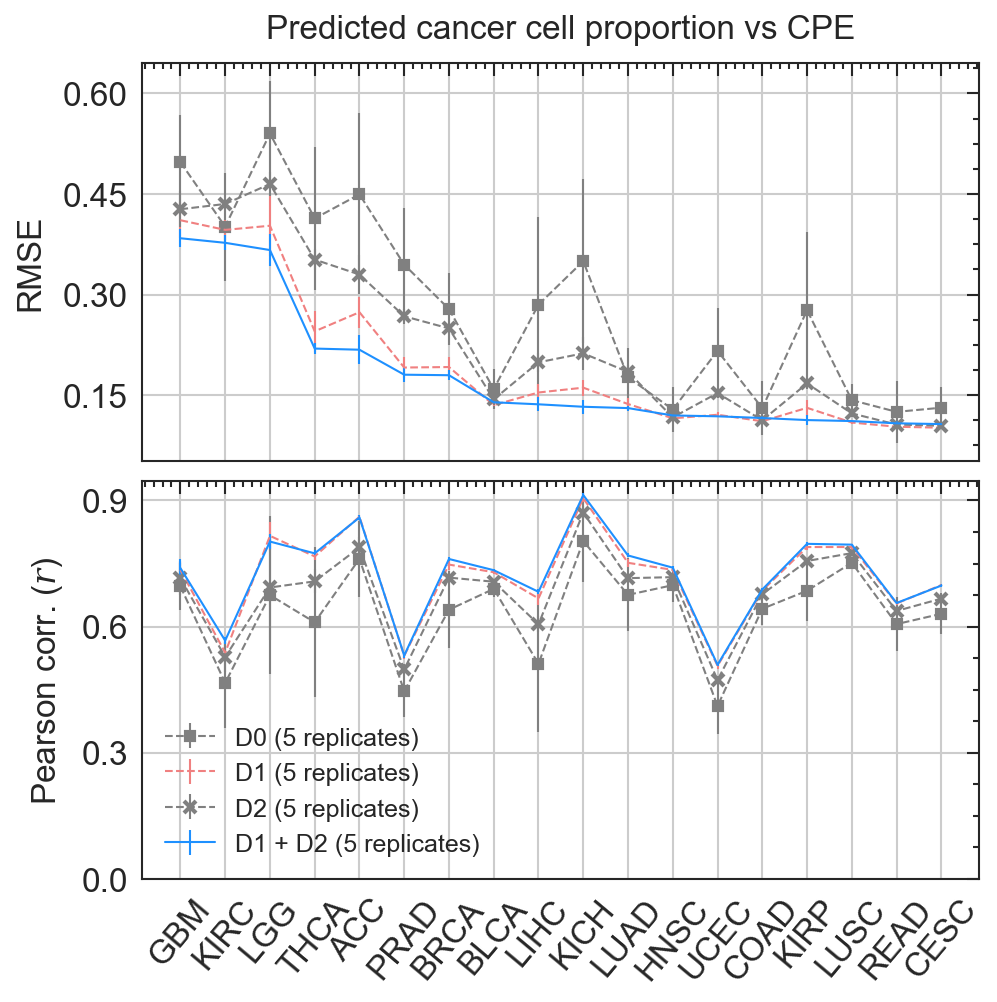

In [28]:
fig, axes = plt.subplots(2, 1, figsize=(3.6, 3.6), sharex=True)
plt.subplots_adjust(wspace=0.1, hspace=0.05)
for i in range(2):
    ax = axes[i]
    if i == 0:
        # ax.plot(cancer_cell_vs_cpe_rmse['Mixed_N100K_random'], label='Mix_N100K_R', c='grey', linewidth=0.5, linestyle='--', marker='.', ms=3)
        ax.errorbar(x=range(18), y=cancer_cell_vs_cpe_rmse['rep_5_d0_mean'], yerr=cancer_cell_vs_cpe_rmse['rep_5_d0_std'], 
                    label='D0 (5 replicates)', c='grey', linewidth=0.5, linestyle='--', marker='s', ms=2)
        
        # ax.plot(cancer_cell_vs_cpe_rmse['Mixed_N100K_segment_filtered'], label='Mix_N100K_SF', c='grey', linewidth=0.5, linestyle='--')
        ax.errorbar(x=range(18), y=cancer_cell_vs_cpe_rmse['rep_5_d1_mean'], yerr=cancer_cell_vs_cpe_rmse['rep_5_d1_std'], 
                    label='D1 (5 replicates)', c='lightcoral', linewidth=0.5, linestyle='--')
        
        # ax.plot(cancer_cell_vs_cpe_rmse['Mixed_N100K_segment_without_filtering'], label='Mix_N100K_SNF', c='grey', linewidth=0.5, linestyle='--', marker='x', ms=3)
        ax.errorbar(x=range(18), y=cancer_cell_vs_cpe_rmse['rep_5_d2_mean'], yerr=cancer_cell_vs_cpe_rmse['rep_5_d2_std'], 
                    label='D2 (5 replicates)', c='grey', linewidth=0.5, linestyle='--', ms=3, marker='x')
        
        ax.errorbar(x=range(18), y=cancer_cell_vs_cpe_rmse['rep_5_d1d2_mean'], yerr=cancer_cell_vs_cpe_rmse['rep_5_d1d2_std'], label='D1 + D2 (5 replicates)', linewidth=0.5, c='dodgerblue')
        ax.grid()
        # ax.legend(fontsize=6, loc='best')
        ax.set_yticks([0.15, 0.3, 0.45, 0.6])
        ax.set_ylabel('RMSE')
        ax.set_title('Predicted cancer cell proportion vs CPE', fontsize=8)
    if i == 1:
        ax.errorbar(x=range(18), y=cancer_cell_vs_cpe_corr['rep_5_d0_mean'], yerr=cancer_cell_vs_cpe_corr['rep_5_d0_std'], label='D0 (5 replicates)', c='grey', linewidth=0.5, linestyle='--', marker='s', ms=2)
        ax.errorbar(x=range(18), y=cancer_cell_vs_cpe_corr['rep_5_d1_mean'], yerr=cancer_cell_vs_cpe_corr['rep_5_d1_std'], label='D1 (5 replicates)', c='lightcoral', linewidth=0.5, linestyle='--')
        ax.errorbar(x=range(18), y=cancer_cell_vs_cpe_corr['rep_5_d2_mean'], yerr=cancer_cell_vs_cpe_corr['rep_5_d2_std'], label='D2 (5 replicates)', c='grey', linewidth=0.5, linestyle='--', marker='x', ms=3)
        ax.errorbar(x=range(18), y=cancer_cell_vs_cpe_corr['rep_5_d1d2_mean'], yerr=cancer_cell_vs_cpe_corr['rep_5_d1d2_std'], label='D1 + D2 (5 replicates)', linewidth=0.5, c='dodgerblue')
        ax.set_ylabel('Pearson corr. ($r$)')
        ax.set_xticks(range(18), cancer_cell_vs_cpe_rmse.index.to_list(), rotation=50, fontsize=8)
        ax.set_yticks([0, 0.3, 0.6, 0.9])
        ax.grid()
        ax.legend(fontsize=6, loc='best')

plt.savefig(os.path.join(fig_dir, 'pred_cancer_cell_prop_vs_cpe_rmse_and_corr.svg'), dpi=300)

In [29]:
current_cancer_cell_prop[rep_dict['rep_5_d1d2']].mean(axis=1).shape

NameError: name 'current_cancer_cell_prop' is not defined

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(3.5, 1.5), sharey=True)
plt.subplots_adjust(wspace=0.1, hspace=0.25)
cancer_type_list = ['LUAD', 'GBM']
for i in range(2):
    ax = axes[i]
    cancer_type = cancer_type_list[i]
    current_cancer_cell_prop = cancer_cell_prop.loc[cancer_cell_prop['cancer_type'] == cancer_type, :].copy()
    # plt.figure(figsize=(1.6, 1.6))
    ax.scatter(current_cancer_cell_prop['CPE'], current_cancer_cell_prop[rep_dict['rep_5_d1d2']].mean(axis=1), s=1)
    ax.text(0.05, 0.95, '$r={:.2f}$'.format(cancer_cell_vs_cpe_corr.loc[cancer_type, 'rep_5_d1d2_mean']), fontsize=5)
    ax.text(0.05, 0.85, '$RMSE={:.3f}$'.format(cancer_cell_vs_cpe_rmse.loc[cancer_type, 'rep_5_d1d2_mean']), fontsize=5)
    ax.plot([0, 1], [0, 1], linestyle='--', color='tab:gray')
    ax.set_xlabel(f'{cancer_type} ({current_cancer_cell_prop.shape[0]})')

# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.title('Predicted cancer cell proportion vs CPE', fontsize=8)
plt.ylabel('Cell proportion', labelpad=5)
_name = '_'.join(cancer_type_list)
plt.savefig(os.path.join(fig_dir, f'cpe_{_name}.svg'), dpi=300)

#### CD4 T cells

In [ ]:
cd4_cell_prop = None
for ds in dataset_names:
    y_pred_file_path = os.path.join(result_dir, ds, 'predicted_cell_fraction_tcga', 'merged_all_signature_score_and_cell_fraction_by_DeSide.csv')
    _ = read_pred_result(y_pred_file_path, col_names=['CD4 T', 'CD4 T_marker_mean', 'cancer_type'], outlier_file_path=outlier_file_path)
    if cd4_cell_prop is None:
        cd4_cell_prop = pd.DataFrame(index=_.index, columns=dataset_names)
    else:
        assert np.all(cd4_cell_prop.index == _.index)
    cd4_cell_prop[ds] = _['CD4 T']
    if 'CD4 T_marker_mean' not in cd4_cell_prop.columns:
        cd4_cell_prop['CD4 T_marker_mean'] = _['CD4 T_marker_mean']
    if 'cancer_type' not in cd4_cell_prop.columns:
        cd4_cell_prop['cancer_type'] = _['cancer_type']

In [ ]:
cd4_cell_prop.head(2)

In [ ]:
# cd4_cell_prop['replication_5_mean'] = cd4_cell_prop.loc[:, replication_5].mean(axis=1)
# cd4_cell_prop.head(2)

In [ ]:
cd4_cell_vs_marker_exp_corr = pd.DataFrame(index=cd4_cell_prop['cancer_type'].unique(), columns=dataset_names)
for cancer_type, _group in cd4_cell_prop.groupby('cancer_type'):
    for ds in dataset_names:
        cd4_cell_vs_marker_exp_corr.loc[cancer_type, ds] = get_corr(_group[ds], _group['CD4 T_marker_mean'])

In [ ]:
for k, rep in rep_dict.items():
    cd4_cell_vs_marker_exp_corr[f'{k}_mean'] = cd4_cell_vs_marker_exp_corr.loc[:, rep].mean(axis=1)
    cd4_cell_vs_marker_exp_corr[f'{k}_std'] = cd4_cell_vs_marker_exp_corr.loc[:, rep].std(axis=1)
cd4_cell_vs_marker_exp_corr.fillna(0, inplace=True)
cd4_cell_vs_marker_exp_corr.head(2)

In [ ]:
cd4_cell_vs_marker_exp_corr = cd4_cell_vs_marker_exp_corr.sort_values(by=['rep_5_d1d2_mean'], ascending=True)

In [ ]:
cd4_cell_vs_marker_exp_corr.to_csv(os.path.join(fig_dir, 'cd4_cell_vs_marker_exp_corr.csv'))

In [ ]:
# plt.figure(figsize=(3.6, 1.8))
fig, ax = plt.subplots(1, 1, figsize=(3.6, 1.8))

ax.errorbar(x=range(19), y=cd4_cell_vs_marker_exp_corr['rep_5_d0_mean'], yerr=cd4_cell_vs_marker_exp_corr['rep_5_d0_std'], 
            label='D0 (5 replicates)', c='grey', linewidth=0.5, linestyle='--', marker='s', ms=2)

# ax.plot(cancer_cell_vs_cpe_rmse['Mixed_N100K_segment_filtered'], label='Mix_N100K_SF', c='grey', linewidth=0.5, linestyle='--')
ax.errorbar(x=range(19), y=cd4_cell_vs_marker_exp_corr['rep_5_d1_mean'], yerr=cd4_cell_vs_marker_exp_corr['rep_5_d1_std'], 
            label='D1 (5 replicates)', c='lightcoral', linewidth=0.5, linestyle='--')

# ax.plot(cancer_cell_vs_cpe_rmse['Mixed_N100K_segment_without_filtering'], label='Mix_N100K_SNF', c='grey', linewidth=0.5, linestyle='--', marker='x', ms=3)
ax.errorbar(x=range(19), y=cd4_cell_vs_marker_exp_corr['rep_5_d2_mean'], yerr=cd4_cell_vs_marker_exp_corr['rep_5_d2_std'], 
            label='D2 (5 replicates)', c='grey', linewidth=0.5, linestyle='--', ms=3, marker='x')

ax.errorbar(x=range(19), y=cd4_cell_vs_marker_exp_corr['rep_5_d1d2_mean'], yerr=cd4_cell_vs_marker_exp_corr['rep_5_d1d2_std'], 
            label='D1 + D2 (5 replicates)', linewidth=0.5, c='dodgerblue')

# plt.plot(cd4_cell_vs_marker_exp_corr['Mixed_N100K_random'], label='D0', c='grey', linewidth=0.5, linestyle='--', marker='.', ms=3)
# plt.plot(cd4_cell_vs_marker_exp_corr['Mixed_N100K_segment_filtered'], label='D1', c='grey', linewidth=0.5, linestyle='--')
# plt.plot(cd4_cell_vs_marker_exp_corr['Mixed_N100K_segment_without_filtering'], label='D2', c='grey', linewidth=0.5, linestyle='--', marker='x', ms=3)
# plt.errorbar(x=range(19), y=cd4_cell_vs_marker_exp_corr['replication_5_mean'], yerr=cd4_cell_vs_marker_exp_corr['replication_5_std'], label='D1 + D2 (5 replicates)')
# plt.errorbar(x=range(18), y=cancer_cell_vs_cpe_corr['replication_5_mean'], yerr=cancer_cell_vs_cpe_corr['replication_5_std'], label='Corr (5 replication)')
plt.xticks(range(19), cd4_cell_vs_marker_exp_corr.index.to_list(), rotation=50, fontsize=8)
plt.yticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=8)
plt.grid()
# plt.legend(fontsize=6, loc='best')
# plt.xlabel('Cancer types')
plt.ylabel('Pearson corr. ($r$)')
plt.title('Pred. cell prop. of CD4 T cells vs signature score', fontsize=8)
plt.tight_layout()
plt.savefig(os.path.join(fig_dir, 'pred_cd4_cell_prop_vs_marker_gene_exp_corr.svg'), dpi=300)